# DataViz #4


Air quality has a big impact over our health. In this notebook you will explore data about potentially harmfull emissions throughout the world.  
The data is provided by OpenAQ which references air quality indicators from sensors disseminated in 49K locations in more than 150 countries around the world.  


> "OpenAQ is the Wikipedia of Air Quality."

_IAN SCHULER  
CEO / Development Seed / Washington, DC USA_

## API exploration and request

### Resources

- requests library https://requests.readthedocs.io/en/latest/user/quickstart/
- le site OpenAQ: https://openaq.org/#/  
- API docs  https://docs.openaq.org/  
- API endpoints  https://docs.openaq.org/  

### ToDo

After installing `requests` use it to carry out API requests on the endpoints as discussed in the kit élève.

- http://perdu.com
- https://api.openaq.org/v2/summary


In [1]:
# Install and import the python library 'requests'

### Your code starts here
import requests

### Your code ends here

In [2]:
# Use the 'get' method from the requests library for 'perdu.com', store the result in a variable named resp_1 and print out the status_code

### Your code starts here
# Make a GET request to 'perdu.com'
resp_1 = requests.get('http://perdu.com')
# Get the status code
resp_1_status_code = resp_1.status_code
### Your code ends here

print(f"{resp_1_status_code = }")
print(f"{resp_1.text = }")

resp_1_status_code = 200
resp_1.text = "<html><head><title>Vous Etes Perdu ?</title></head><body><h1>Perdu sur l'Internet ?</h1><h2>Pas de panique, on va vous aider</h2><strong><pre>    * <----- vous &ecirc;tes ici</pre></strong></body></html>\n"


Congratulations with carying out this first request!  
Now let's get back to OpenAQ... 

In [3]:
# In the following request we will retreive a json (JavaScript Object Notation) string
# which we can then parse and handle in the same way as a Python dictionary!

# the 'base_url' variable below is used as root from which all the other endpoints of the API can be accessed:
base_url = "https://api.openaq.org/v2"
# -> use the API endpoint which provides a "summary" of the data stored on OpenAQ's servers to complete the base_url
# Define the API endpoint for the summary
endpoint = "/summary"
# Construct the complete URL
url = base_url + endpoint
### Your code starts here
# Construct the complete URL
resp_3 = requests.get(url)
# Make a GET request to the summary endpoint
resp_3_status_code = resp_3.status_code
# Get the status code
resp_3_json = resp_3.json()
### Your code ends here

print(f"{resp_3_status_code = }\n")
print(f"{isinstance(resp_3_json, dict) = }\n")
print(f"{resp_3_json = }") 

resp_3_status_code = 200

isinstance(resp_3_json, dict) = True

resp_3_json = {'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1000, 'found': 1}, 'results': [{'count': 53506882457, 'cities': 2407, 'sources': 165, 'countries': 115, 'locations': 59612}]}


This json object (or python dictionary) is already something, but why not make the data returned in the request even more intelligible and easy to process?! Now that the data is accessible locally in this notebook, we can take advantage of the entire processing power of python and the pandas library!

In [4]:
# Install and import the pandas library and create a dataframe from the 'results' list returned in the json object from the previous request

### Your code starts here
import pandas as pd
results_list = resp_3_json['results']
df_summary = pd.DataFrame.from_dict(results_list)
### Your code ends here

print(f"check: {all(df_summary.columns == ['count', 'cities', 'sources', 'countries', 'locations']) = }")
df_summary.head()

check: all(df_summary.columns == ['count', 'cities', 'sources', 'countries', 'locations']) = True


/tmp/ipykernel_15065/3615678196.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,count,cities,sources,countries,locations
0,53506882457,2407,165,115,59612


Now you know the basics to interact with OpenAQ's API and retreive usefull data to answer all the questions you might be having about air quality throughout the world!  
Don't hesitate to play around with the **'Try it out'** button in their API documentation, it will give you usefull information about how to write the urls for your particular requests.

In [5]:
import requests

url = "https://api.openaq.org/v2/measurements?location_id=4581&parameter=no2&parameter=co&parameter=no&parameter=pm25&parameter=pm10&date_from=2000-01-24T10:59:57+01:00&date_to=2024-01-25T10:59:57+01:00&limit=1000"
headers = {
    "accept": "application/json",
    "content-type": "application/json"
}

response = requests.get(url, headers=headers)
Baden_Wurttemberg = response.json()['results']
df_Baden_Wurttemberg = pd.DataFrame.from_dict(Baden_Wurttemberg)
print(response.json()['results'])
df_Baden_Wurttemberg

[{'locationId': 4581, 'location': 'DEBW080', 'parameter': 'co', 'value': 200.0, 'date': {'utc': '2024-01-25T01:00:00+00:00', 'local': '2024-01-25T02:00:00+01:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 49.00796, 'longitude': 8.38719}, 'country': 'DE', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 4581, 'location': 'DEBW080', 'parameter': 'co', 'value': 200.0, 'date': {'utc': '2024-01-25T00:00:00+00:00', 'local': '2024-01-25T01:00:00+01:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 49.00796, 'longitude': 8.38719}, 'country': 'DE', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 4581, 'location': 'DEBW080', 'parameter': 'co', 'value': 300.0, 'date': {'utc': '2024-01-24T21:00:00+00:00', 'local': '2024-01-24T22:00:00+01:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 49.00796, 'longitude': 

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,4581,DEBW080,co,200.0,"{'utc': '2024-01-25T01:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
1,4581,DEBW080,co,200.0,"{'utc': '2024-01-25T00:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
2,4581,DEBW080,co,300.0,"{'utc': '2024-01-24T21:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
3,4581,DEBW080,co,200.0,"{'utc': '2024-01-24T20:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
4,4581,DEBW080,co,300.0,"{'utc': '2024-01-24T19:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4581,DEBW080,co,300.0,"{'utc': '2023-12-11T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
996,4581,DEBW080,co,300.0,"{'utc': '2023-12-11T12:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
997,4581,DEBW080,co,300.0,"{'utc': '2023-12-11T11:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
998,4581,DEBW080,co,400.0,"{'utc': '2023-12-11T08:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade


In [18]:
pd.set_option('display.max_columns', None)  # Show all columns

# Print the DataFrame
print(df_Baden_Wurttemberg)

In [6]:

# Select only the desired columns
selected_columns = ['parameter', 'value', 'date']
df_new = df_Baden_Wurttemberg[selected_columns].copy()

# Print the new DataFrame
print(df_new.head())

  parameter  value                                               date
0        co  200.0  {'utc': '2024-01-25T01:00:00+00:00', 'local': ...
1        co  200.0  {'utc': '2024-01-25T00:00:00+00:00', 'local': ...
2        co  300.0  {'utc': '2024-01-24T21:00:00+00:00', 'local': ...
3        co  200.0  {'utc': '2024-01-24T20:00:00+00:00', 'local': ...
4        co  300.0  {'utc': '2024-01-24T19:00:00+00:00', 'local': ...


In [7]:
# Extract 'utc' part and convert to datetime
df_Baden_Wurttemberg['date'] = pd.to_datetime(df_Baden_Wurttemberg['date'].apply(lambda x: x['utc']))

# Set 'date' column as the index
df_Baden_Wurttemberg.set_index('date', inplace=True)

# Print the time series DataFrame
print(df_Baden_Wurttemberg.head())

                           locationId location parameter  value   unit  \
date                                                                     
2024-01-25 01:00:00+00:00        4581  DEBW080        co  200.0  µg/m³   
2024-01-25 00:00:00+00:00        4581  DEBW080        co  200.0  µg/m³   
2024-01-24 21:00:00+00:00        4581  DEBW080        co  300.0  µg/m³   
2024-01-24 20:00:00+00:00        4581  DEBW080        co  200.0  µg/m³   
2024-01-24 19:00:00+00:00        4581  DEBW080        co  300.0  µg/m³   

                                                            coordinates  \
date                                                                      
2024-01-25 01:00:00+00:00  {'latitude': 49.00796, 'longitude': 8.38719}   
2024-01-25 00:00:00+00:00  {'latitude': 49.00796, 'longitude': 8.38719}   
2024-01-24 21:00:00+00:00  {'latitude': 49.00796, 'longitude': 8.38719}   
2024-01-24 20:00:00+00:00  {'latitude': 49.00796, 'longitude': 8.38719}   
2024-01-24 19:00:00+00:00  {'la

In [8]:
df_Baden_Wurttemberg.reset_index(inplace=True)

In [9]:
df_Baden_Wurttemberg

,date,locationId,location,parameter,value,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,2024-01-25 01:00:00+00:00,4581,DEBW080,co,200.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
1,2024-01-25 00:00:00+00:00,4581,DEBW080,co,200.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
2,2024-01-24 21:00:00+00:00,4581,DEBW080,co,300.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
3,2024-01-24 20:00:00+00:00,4581,DEBW080,co,200.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
4,2024-01-24 19:00:00+00:00,4581,DEBW080,co,300.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-12-11 13:00:00+00:00,4581,DEBW080,co,300.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
996,2023-12-11 12:00:00+00:00,4581,DEBW080,co,300.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
997,2023-12-11 11:00:00+00:00,4581,DEBW080,co,300.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade
998,2023-12-11 08:00:00+00:00,4581,DEBW080,co,400.0,µg/m³,"{'latitude': 49.00796, 'longitude': 8.38719}",DE,None,False,None,Governmental Organization,reference grade


In [10]:
import plotly.express as px

fig = px.bar(df_Baden_Wurttemberg, x="date", y="value", title='concentration  of co in the day')
fig.show()

## A vous de jouer!

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
base_url = "https://api.openaq.org/v2"

In [13]:
# Assuming df_shorashim is your DataFrame

# Display summary statistics for each parameter
summary_stats = df_Baden_Wurttemberg.describe()

# Print the summary statistics
print("Summary Statistics for Each Parameter:")
print(summary_stats)

# If you want to compare statistics between different parameters or time periods,
# you can group the data and calculate statistics for each group
grouped_stats = df_Baden_Wurttemberg.groupby('parameter').describe()

# Print the grouped statistics
print("\nGrouped Summary Statistics by Parameter:")
print(grouped_stats)


Summary Statistics for Each Parameter:
       locationId        value
count      1000.0  1000.000000
mean       4581.0   391.500000
std           0.0   182.183811
min        4581.0   100.000000
25%        4581.0   200.000000
50%        4581.0   300.000000
75%        4581.0   500.000000
max        4581.0  1700.000000

Grouped Summary Statistics by Parameter:
          locationId                                                       \
               count    mean  std     min     25%     50%     75%     max   
parameter                                                                   
co            1000.0  4581.0  0.0  4581.0  4581.0  4581.0  4581.0  4581.0   

            value                                                         
            count   mean         std    min    25%    50%    75%     max  
parameter                                                                 
co         1000.0  391.5  182.183811  100.0  200.0  300.0  500.0  1700.0  


/home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/shahaf.hen@Digital-Grenoble.local/.anaco

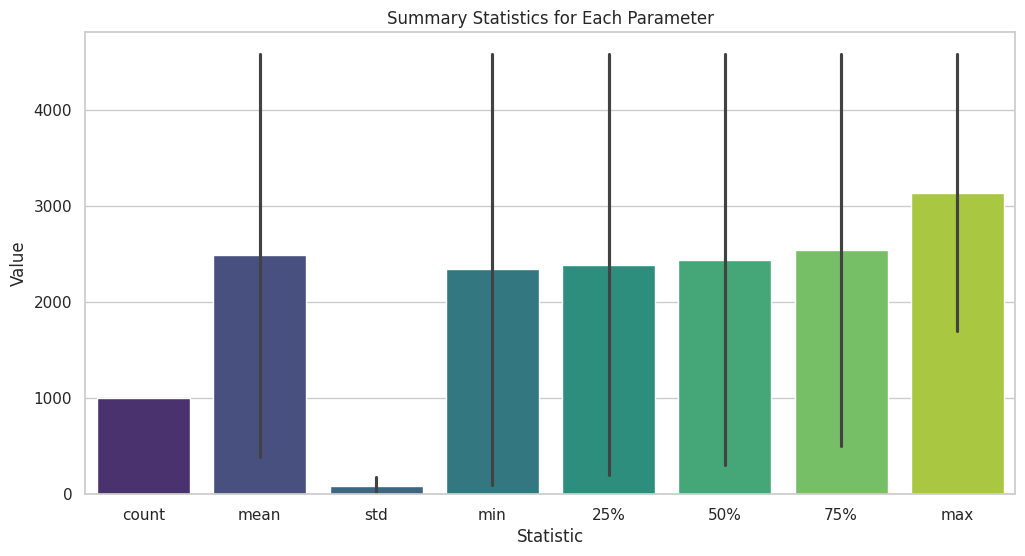

/home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



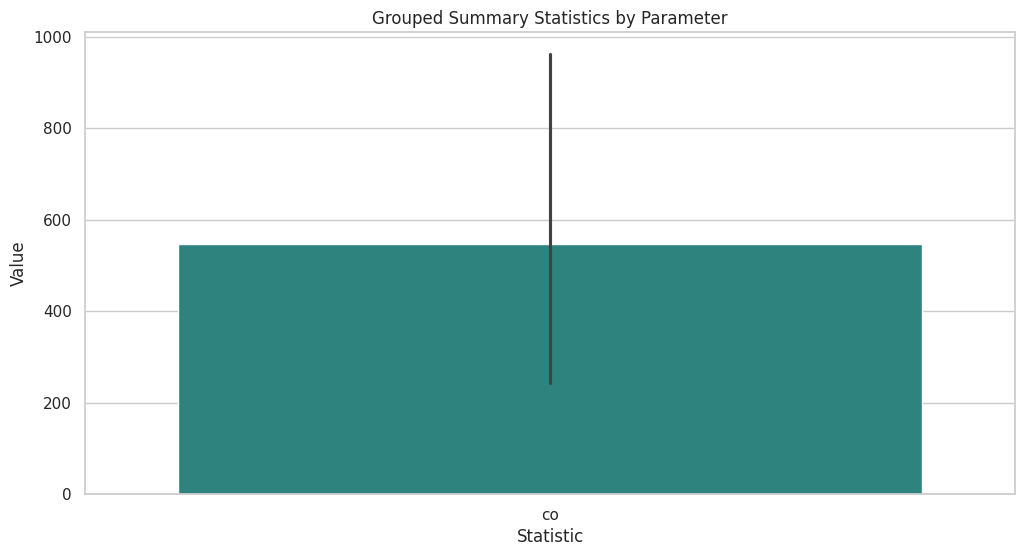

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot summary statistics for each parameter
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.transpose(), palette="viridis")
plt.title("Summary Statistics for Each Parameter")
plt.ylabel("Value")
plt.xlabel("Statistic")
plt.show()

# Plot grouped summary statistics by parameter
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_stats['value'].transpose(), palette="viridis")
plt.title("Grouped Summary Statistics by Parameter")
plt.ylabel("Value")
plt.xlabel("Statistic")
plt.show()


In [15]:
import plotly.express as px

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_shorashim is your DataFrame
# If 'date' is not in datetime format, convert it first
df_shorashim['date'] = pd.to_datetime(df_shorashim['date'])

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the variation of air quality parameters over time
plt.figure(figsize=(16, 8))
sns.lineplot(x='date', y='value', hue='parameter', data=df_shorashim)
plt.title("Air Quality Parameters Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


NameError: name 'df_shorashim' is not defined

In [ ]:
df_shorashim['day'] = df_shorashim['date'].dt.day
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='value', hue='parameter', data=df_shorashim)
plt.title("Daily Trends of Air Quality Parameters")
plt.xlabel("Day of Month")
plt.ylabel("Value")
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_shorashim['weekday'] = df_shorashim['date'].dt.weekday
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='value', hue='parameter', data=df_shorashim)
plt.title("Weekly Trends of Air Quality Parameters")
plt.xlabel("Day of Week")
plt.ylabel("Value")
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values